In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Shows.csv")

#### 1.1) Removing Columns

In [17]:
del df['Unnamed: 0']
del df['ID']
del df['Year']
del df['Duration']
del df['Reviews']
del df['Rating']
del df['Link']

df.head()

,Name,Director,Genre
0,Planet Earth II,David Attenborough|Chadden Hunter|Elizabeth White,Documentary
1,Planet Earth,David Attenborough|Sigourney Weaver|Nikolay Dr...,Documentary
2,Breaking Bad,Bryan Cranston|Aaron Paul|Anna Gunn,Crime|Drama|Thriller
3,Band of Brothers,Scott Grimes|Damian Lewis|Ron Livingston,Drama|History|War
4,Chernobyl,Jessie Buckley|Jared Harris|Stellan Skarsgård,Drama|History|Thriller


#### 1.2) Checking Null Values

In [18]:
df.isnull().sum()

Name        0
Director    0
Genre       0
dtype: int64

#### 1.3) Finding All Genre

In [19]:
genre = []

for i in df['Genre']:
    
    genre += [j.strip() for j in i.split('|')]
    
genre = list(set(genre))

#### 1.4) Count No. of Shows in Each Genre

In [20]:
data = []

for g in genre:    
    c = 0
    for i in df['Genre']:   
        gen = [j.strip() for j in i.split('|')]
        if (g in gen):
            c += 1
    data.append([g , c])
    
df_ = pd.DataFrame(data, columns = ['Genre','Freq'])
df_

,Genre,Freq
0,Horror,7
1,Adventure,46
2,Fantasy,5
3,Drama,123
4,Short,2
5,War,4
6,Sci-Fi,6
7,Nan,24
8,Romance,10
9,Family,6


#### 1.5) Top 5 Genre in terms of number of Shows

In [21]:
df_.sort_values(by = 'Freq', ascending = False).head()

,Genre,Freq
3,Drama,123
15,Comedy,71
25,Action,55
12,Crime,52
11,Animation,48


#### 1.6) Gerne Distribution in Series (Visualization)

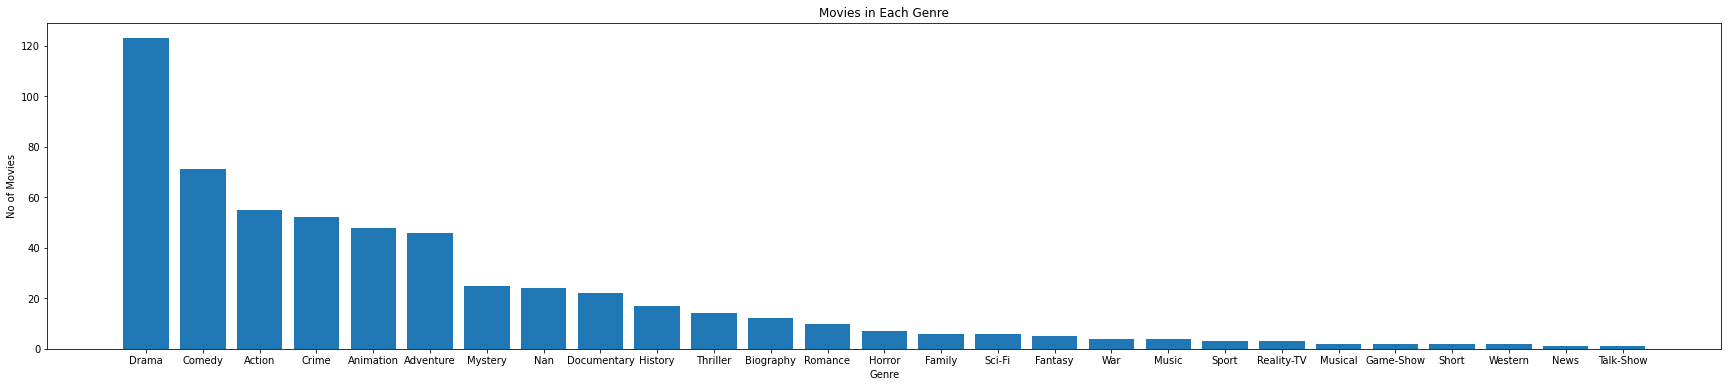

In [24]:
x = df_.sort_values(by = 'Freq', ascending = False)['Genre'].values
y = df_.sort_values(by = 'Freq', ascending = False)['Freq'].values

fig ,ax = plt.subplots(figsize = (30,6))

ax.bar(x,y)

plt.xlabel('Genre')
plt.ylabel('No of Movies')
plt.title('Movies in Each Genre')

plt.show()

#### 2.1) Finding Number of Series Director by each Director

In [62]:
data = []
directors = [] 

for j in [i.split('|') for i in df['Director']]:
    directors += j
    
directors = list(set(directors))

for director in directors:

    c = 0
    for i in df['Director']:
        if(director in i):
            c += 1

    data.append([director,c])
    
df_ = pd.DataFrame(data, columns = ['Director','Freq'])

df_.head()

,Director,Freq
0,Nolan North,2
1,Jonathan Banks,1
2,Kate Winslet,1
3,Edward Hardwicke,1
4,Asante Blackk,1


#### 2.2) Top 20 Directors who made most number of Series

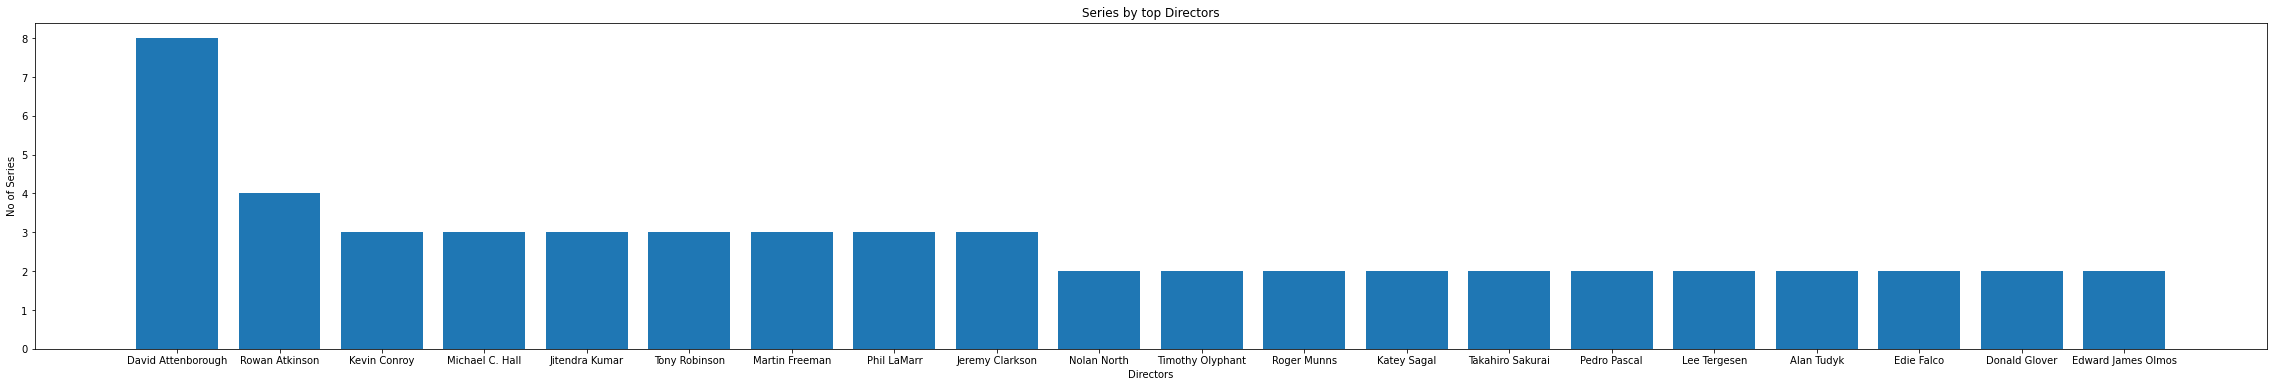

In [69]:
x = df_.sort_values(by = 'Freq', ascending = False).head(20)['Director'].values
y = df_.sort_values(by = 'Freq', ascending = False).head(20)['Freq'].values

fig ,ax = plt.subplots(figsize = (40,6))

ax.bar(x,y)

plt.xlabel('Directors')
plt.ylabel('No of Series')
plt.title('Series by top Directors')

plt.show()